In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [27]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [28]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [29]:

# Functional API
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)


In [35]:
for layer in base_model.layers:
    layer.trainable = False


In [36]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [37]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\suman\Downloads\DS\DL\PetImages\train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    r'C:\Users\suman\Downloads\DS\DL\PetImages\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 240 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [11]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=2)


Epoch 1/2
7/7 [==============================] - 23s 3s/step - loss: 1.0947 - accuracy: 0.4808
Epoch 2/2
7/7 [==============================] - 22s 3s/step - loss: 0.9147 - accuracy: 0.5000


In [12]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')


1/1 [==============================] - 5s 5s/step - loss: 0.8273 - accuracy: 0.5556
Validation accuracy: 55.56%


In [38]:
for layer in base_model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=2)


Epoch 1/2
7/7 [==============================] - 36s 4s/step - loss: 0.6933 - accuracy: 0.5337
Epoch 2/2
7/7 [==============================] - 29s 4s/step - loss: 0.6658 - accuracy: 0.5982


In [15]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')


1/1 [==============================] - 5s 5s/step - loss: 0.7589 - accuracy: 0.5556
Validation accuracy: 55.56%


In [21]:


import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D
from tensorflow.keras.models import Model

def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=False):
    shortcut = x
    if conv_shortcut:
        shortcut = Conv2D(filters, 1, strides=stride)(x)
        shortcut = BatchNormalization()(shortcut)
    
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Example usage
input_tensor = Input(shape=(224, 224, 64))
output_tensor = residual_block(input_tensor, filters=64)
model = Model(inputs=input_tensor, outputs=output_tensor)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 6  0           []                               
                                4)]                                                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 224, 224, 64  36928       ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 224, 224, 64  256        ['conv2d_7[0][0]']               
 rmalization)                   )                                                           

Skip connections, also known as shortcut connections or identity mappings, are a fundamental component of ResNet (Residual Network) architecture. They address the problem of vanishing and exploding gradients, which can hinder the training of deep neural networks. Here's a detailed explanation of skip connections and their benefits:

### 1. **What is a Skip Connection?**
A skip connection is a direct path that bypasses one or more layers in a neural network. In the context of ResNet, this means that the output of a particular layer is added to the output of a deeper layer, skipping intermediate layers. Mathematically, this can be represented as:

\[ \mathbf{y} = \mathcal{F}(\mathbf{x}, \{W_i\}) + \mathbf{x} \]

where:
- \(\mathbf{x}\) is the input to the layer.
- \(\mathcal{F}(\mathbf{x}, \{W_i\})\) represents the transformation applied by the intermediate layers, parameterized by the weights \(\{W_i\}\).
- \(\mathbf{y}\) is the output after adding the input \(\mathbf{x}\) (the skip connection) to the transformation output.

### 2. **Types of Skip Connections**
There are two main types of skip connections in ResNet:
- **Identity Skip Connection**: The input \(\mathbf{x}\) is added directly to the output of the intermediate layers without any modification.
- **Convolutional Skip Connection**: When the dimensions of \(\mathbf{x}\) and \(\mathcal{F}(\mathbf{x}, \{W_i\})\) do not match (e.g., due to a change in the number of filters or spatial dimensions), a convolutional layer (typically 1x1 convolution) is applied to \(\mathbf{x}\) to match the dimensions before adding.

### 3. **Why Use Skip Connections?**
Skip connections help to mitigate several issues in deep networks:
- **Vanishing/Exploding Gradients**: By providing a direct path for the gradient during backpropagation, skip connections help maintain the gradient's strength, making it easier to train very deep networks.
- **Identity Mapping**: They allow layers to learn identity mappings more easily, enabling the network to behave like a shallower network if deeper layers are not useful. This ensures that deeper networks do not perform worse than their shallower counterparts.
- **Improved Gradient Flow**: They facilitate better gradient flow through the network, leading to more efficient training and convergence.

### 4. **Example: Residual Block with Skip Connection**
Here's an example of how a residual block with a skip connection is implemented in Keras:

```

### 5. **Benefits of Skip Connections**
- **Ease of Optimization**: Networks with skip connections are easier to optimize because they allow gradients to flow through the network more smoothly.
- **Deep Network Training**: Enable the training of much deeper networks without degradation in performance, which is often observed in traditional deep networks.
- **Performance**: Empirical results have shown that networks with skip connections often outperform traditional architectures on a variety of tasks, including image classification, object detection, and segmentation.

### Conclusion
Skip connections are a critical innovation in deep learning, enabling the training of very deep networks by mitigating issues related to gradient flow and network optimization. They are the cornerstone of ResNet architectures and have been widely adopted in many state-of-the-art neural network designs.

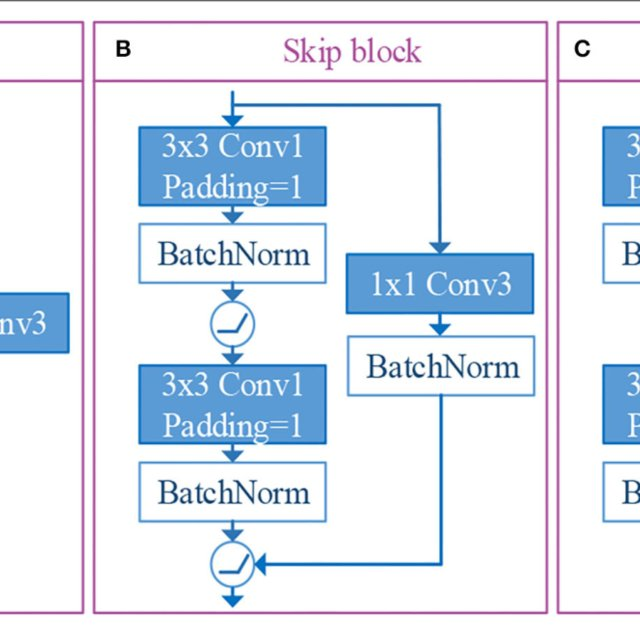

In [18]:
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=False):
    shortcut = x
    if conv_shortcut:
        shortcut = Conv2D(filters, 1, strides=stride)(x)
        shortcut = BatchNormalization()(shortcut)
    
    x = Conv2D(filters, kernel_size, padding='same', strides=stride)(x) # 2nd layer
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, kernel_size, padding='same')(x) # 3rd
    x = BatchNormalization()(x)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x


In [22]:
def build_resnet(input_shape, num_classes, num_blocks):
    inputs = Input(shape=input_shape)
    
    # Initial Convolution and MaxPooling
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Residual Blocks
    for filters, blocks in zip([64, 128, 256, 512], num_blocks):
        for i in range(blocks):
            if i == 0:
                x = residual_block(x, filters, conv_shortcut=True, stride=2)
            else:
                x = residual_block(x, filters)
    
    # Global Average Pooling and Dense Output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    return model


In [23]:
input_shape = (224, 224, 3)
num_classes = 2  # For cats and dogs
num_blocks = [2, 2, 2, 2]

model = build_resnet(input_shape, num_classes, num_blocks)
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 112, 112, 64  9472        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 112, 112, 64  256        ['conv2d_9[0][0]']               
 rmalization)                   )                                                           

 activation_15 (Activation)     (None, 14, 14, 128)  0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 14, 14, 128)  147584      ['activation_15[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 14, 14, 128)  512        ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_6 (Add)                    (None, 14, 14, 128)  0           ['batch_normalization_19[0][0]', 
                                                                  'activation_14[0][0]']          
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 add_10 (Add)                   (None, 4, 4, 512)    0           ['batch_normalization_29[0][0]', 
                                                                  'activation_22[0][0]']          
                                                                                                  
 activation_24 (Activation)     (None, 4, 4, 512)    0           ['add_10[0][0]']                 
                                                                                                  
 global_average_pooling2d_1 (Gl  (None, 512)         0           ['activation_24[0][0]']          
 obalAveragePooling2D)                                                                            
                                                                                                  
 dense_2 (